In [12]:
import pandas as pd
import os


# Get the current working directory (not using __file__)
base_dir = os.getcwd()


# Construct the path to the Excel file in the same folder
excel_path = os.path.join(base_dir, 'Telco-Customer-Churn (3)- updated.xlsx')


# Load the Excel file
df = pd.read_excel(excel_path)
df = df.drop(columns=['customerID'])

#one hot encoding for categorical columns
# Only one-hot encode selected categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())
df = df_encoded




   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0         True           False             False              False   
1        False           False              True              False   
2        False           False              True              False   
3        False           False             False              False   
4        False           False              True              False   

   InternetService_Fiber optic  ...  TechSupport_Yes  StreamingTV_Yes  \
0                        False  ...            False            False   


In [13]:
#Explatory Data Analysis

#Part A
# Basic information about the dataset
print('----------------------- EDA Section (Task 2) -------------------------\n'
      '\n             Basic Information about the Dataset\n\n'
      '----------------------------------------------------------------------\n')


print(df.info())

# Summary statistics for numerical columns
print(df.describe())


#Part B: Check class distribution
# Count the unique values in the target column (replace 'Churn' with your actual target column)
print(df['Churn_Yes'].value_counts(normalize=True) * 100)  # Shows percentage of each class

#B1: Understand Customer Demographics and Features

# Analyze churn by gender, senior citizen status, partner, and dependents
print(df.groupby('gender_Male')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('SeniorCitizen')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('Partner_Yes')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('Dependents_Yes')['Churn_Yes'].value_counts(normalize=True))

#B2: Explore Customer Tenure
# Create tenure categories
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Get the count and relative frequency of Churn by TenureGroup
tenure_churn_counts = df.groupby('TenureGroup')['Churn_Yes'].value_counts()
tenure_churn_percentage = df.groupby('TenureGroup')['Churn_Yes'].value_counts(normalize=True)

# Display counts and percentages
print("Count of Churn by Tenure Group:\n", tenure_churn_counts)
print("\nPercentage of Churn by Tenure Group:\n", tenure_churn_percentage)

#B3: Analyze Service Usage
print(df.groupby('InternetService_Fiber optic')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('InternetService_No')['Churn_Yes'].value_counts(normalize=True))


#B4: Analyze Contract and Payment Method
# Churn analysis by contract type
print(df.groupby('Contract_One year')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('Contract_Two year')['Churn_Yes'].value_counts(normalize=True))

# Churn analysis by payment method
print(df.groupby('PaymentMethod_Credit card (automatic)')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('PaymentMethod_Electronic check')['Churn_Yes'].value_counts(normalize=True))
print(df.groupby('PaymentMethod_Mailed check')['Churn_Yes'].value_counts(normalize=True))



----------------------- EDA Section (Task 2) -------------------------

             Basic Information about the Dataset

----------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1820\2577726762.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_counts = df.groupby('TenureGroup')['Churn_Yes'].value_counts()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_1820\2577726762.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_percentage = df.groupby('TenureGroup')['Churn_Yes'].value_counts(normalize=True)


In [14]:
print('\n\n\n---------------------------------------- Dataset Balancing (Task 3) --------------------------------\n'
      '\n                       Techniques such as: oversampling, undersampling, or SMOTE '
      '\n                   Cost Sensitive Learning to assign different wieghts to Random Forest \n'
      '\n                   In progress - to review SMOTE if needed  \n'
      '-----------------------------------------------------------------------------------------------------\n')

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler






# Separate features and target
X = df.drop(columns=['Churn_Yes'])
X_encoded = pd.get_dummies(X, drop_first=True)
y = df['Churn_Yes']

print("Original class distribution:\n", y.value_counts())



from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['TenureGroup'] = le.fit_transform(X['TenureGroup'])



# Oversampling
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
print("\nOversampled class distribution:\n", y_over.value_counts())

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print("\nUndersampled class distribution:\n", y_under.value_counts())

#print("Missing values in features (X):\n", X.isnull().sum())
#print("Missing values in target (y):\n", y.isnull().sum())


# Now proceed with SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the resampled class distribution
print("\nResampled class distribution using SMOTE:\n", y_smote.value_counts())






---------------------------------------- Dataset Balancing (Task 3) --------------------------------

                       Techniques such as: oversampling, undersampling, or SMOTE 
                   Cost Sensitive Learning to assign different wieghts to Random Forest 

                   In progress - to review SMOTE if needed  
-----------------------------------------------------------------------------------------------------

Original class distribution:
 Churn_Yes
False    5174
True     1869
Name: count, dtype: int64

Oversampled class distribution:
 Churn_Yes
False    5174
True     5174
Name: count, dtype: int64

Undersampled class distribution:
 Churn_Yes
False    1869
True     1869
Name: count, dtype: int64

Resampled class distribution using SMOTE:
 Churn_Yes
False    5174
True     5174
Name: count, dtype: int64


In [15]:
print('\n\n\n---------------------------------------- Model Training & Comparison (Task 4) --------------------------------\n'
      '\n                       Train Random Forest Classifier on balanced dataset '
      '\n                   The Training is  occurring in the background- '
      '\n                     More information to be added and In progress  \n\n'
      '-----------------------------------------------------------------------------------------------------\n\n\n')


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest classifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Step 3: Train Support Vector Classifier
svc_clf = SVC(class_weight='balanced', random_state=42)
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

# Step 4: Train k-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)









---------------------------------------- Model Training & Comparison (Task 4) --------------------------------

                       Train Random Forest Classifier on balanced dataset 
                   The Training is  occurring in the background- 
                     More information to be added and In progress  

-----------------------------------------------------------------------------------------------------





In [ ]:
print('\n\n\n---------------------------------------- Model Training & Comparison  (Task 5) --------------------------------\n'
      '\n                       Use cross-validation and metrics to compare performance between models '
      '\n                                 to review cross-validation that is in progress   '   
      '\n                     More reviews to be done and In progress  \n\n'
      '-----------------------------------------------------------------------------------------------------\n')



# Metric Definitions
print("\nMetric Definitions:\n"
      "1. Accuracy: The percentage of correctly classified instances out of all instances.\n"
      "2. Precision: The percentage of true positive predictions out of all positive predictions.\n"
      "3. Recall: The percentage of true positive cases correctly identified out of all actual positive cases.\n"
      "4. F1 Score: Considers precision and recall, balancing both metrics.\n")




# Step 1: Evaluate all models
models = {
      "Random Forest": y_pred_rf,
      "Support Vector Classifier": y_pred_svc,
      "k-Nearest Neighbors": y_pred_knn
}

for model_name, y_pred in models.items():
      print(f"\n{model_name} Performance:")
      print("Accuracy:", accuracy_score(y_test, y_pred))
      print("Precision:", precision_score(y_test, y_pred))
      print("Recall:", recall_score(y_test, y_pred))
      print("F1 Score:", f1_score(y_test, y_pred))


# Step 2: Create a DataFrame to store model performance metrics

metrics_list = []
# Iterate over each model and its predictions
for model_name, y_pred in models.items():
      model_metrics = {
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred)
      }
      metrics_list.append(model_metrics)

metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.set_index("Model").T

print("\nModel Performance Evaluation:\n")
print(metrics_df)



#cross validation test************** In progress
from sklearn.model_selection import cross_val_score

#  for Random Forest
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_cv_scores = cross_val_score(rf_clf, X_smote, y_smote, cv=10, scoring='accuracy')  # 10-fold cross-validation
print(f"Random Forest Cross-validation Accuracy: {rf_cv_scores.mean()}")







---------------------------------------- Model Training & Comparison  (Task 5) --------------------------------

                       Use cross-validation and metrics to compare performance between models 
                                 to review cross-validation that is in progress   
                     More reviews to be done and In progress  

-----------------------------------------------------------------------------------------------------


Metric Definitions:
1. Accuracy: The percentage of correctly classified instances out of all instances.
2. Precision: The percentage of true positive predictions out of all positive predictions.
3. Recall: The percentage of true positive cases correctly identified out of all actual positive cases.
4. F1 Score: Considers precision and recall, balancing both metrics.


Random Forest Performance:
Accuracy: 0.855072463768116
Precision: 0.855650522317189
Recall: 0.8589132507149666
F1 Score: 0.857278782112274

Support Vector Classifier Pe




---------------------------------------- Other notes --------------------------------

                       The below section is for other notes and observations 


                       Currently reviewing 

-----------------------------------------------------------------------------------------------------



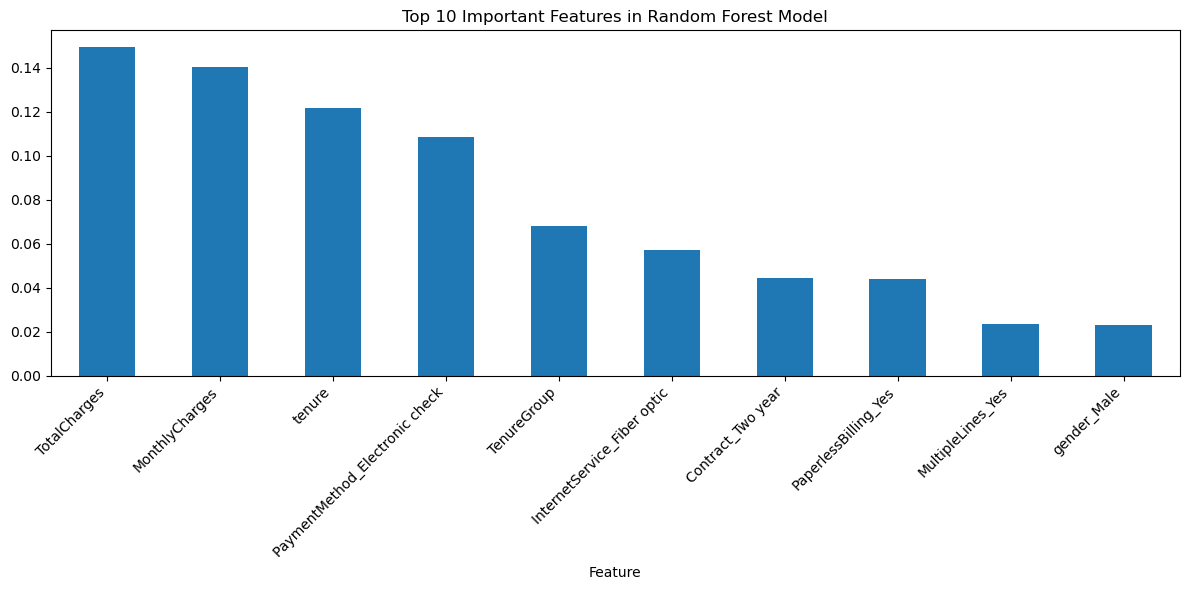

                           Feature  Importance
3                     TotalCharges    0.149642
2                   MonthlyCharges    0.140272
1                           tenure    0.121655
21  PaymentMethod_Electronic check    0.108606
23                     TenureGroup    0.067902
9      InternetService_Fiber optic    0.057333
18               Contract_Two year    0.044526
19            PaperlessBilling_Yes    0.044131
8                MultipleLines_Yes    0.023498
4                      gender_Male    0.022829
The next steps are to check if the most important features found (such as Total Charges, Monthly Charges, tenure)
in the Random Forest Model are relevant to determine the target variable and if actually determining features


In [8]:
print('\n\n\n---------------------------------------- Other notes --------------------------------\n'
      '\n                       The below section is for other notes and observations \n\n'
      '\n                       Currently reviewing \n\n'
      '-----------------------------------------------------------------------------------------------------\n')

#Examples on feature importance
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns  # List of feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plot the top 10 most important features with a larger figure size
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
importance_df.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False, ax=plt.gca())
plt.title('Top 10 Important Features in Random Forest Model')

# Rotate the x-axis labels for clarity
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Print the feature importances
print(importance_df.head(10))


print("The next steps are to check if the most important features found (such as Total Charges, Monthly Charges, tenure)"
      "\nin the Random Forest Model are relevant to determine the target variable and if actually determining features")

